<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#K-means" data-toc-modified-id="K-means-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="http://jonchar.net/notebooks/k-means/" target="_blank">K-means</a></a></span></li><li><span><a href="#Your-First-Machine-Learning-Project-in-Python-Step-By-Step" data-toc-modified-id="Your-First-Machine-Learning-Project-in-Python-Step-By-Step-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><a href="https://machinelearningmastery.com/machine-learning-in-python-step-by-step/" target="_blank">Your First Machine Learning Project in Python Step-By-Step</a></a></span><ul class="toc-item"><li><span><a href="#Load-The-Data" data-toc-modified-id="Load-The-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load The Data</a></span><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Load Dataset</a></span></li></ul></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Visualization</a></span></li><li><span><a href="#Class-Distribution" data-toc-modified-id="Class-Distribution-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Class Distribution</a></span></li><li><span><a href="#Play-with-Pandas-and-DataFrame" data-toc-modified-id="Play-with-Pandas-and-DataFrame-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Play with Pandas and DataFrame</a></span></li><li><span><a href="#Data-Visualization" data-toc-modified-id="Data-Visualization-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data Visualization</a></span><ul class="toc-item"><li><span><a href="#Univariate-Plots" data-toc-modified-id="Univariate-Plots-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Univariate Plots</a></span></li></ul></li><li><span><a href="#Evaluate-Some-Algorithms" data-toc-modified-id="Evaluate-Some-Algorithms-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Evaluate Some Algorithms</a></span><ul class="toc-item"><li><span><a href="#Create-a-Validation-Dataset" data-toc-modified-id="Create-a-Validation-Dataset-2.6.1"><span class="toc-item-num">2.6.1&nbsp;&nbsp;</span>Create a Validation Dataset</a></span></li><li><span><a href="#Test-the-Methods" data-toc-modified-id="Test-the-Methods-2.6.2"><span class="toc-item-num">2.6.2&nbsp;&nbsp;</span>Test the Methods</a></span></li><li><span><a href="#Build-Models" data-toc-modified-id="Build-Models-2.6.3"><span class="toc-item-num">2.6.3&nbsp;&nbsp;</span>Build Models</a></span></li><li><span><a href="#Select-Best-Model" data-toc-modified-id="Select-Best-Model-2.6.4"><span class="toc-item-num">2.6.4&nbsp;&nbsp;</span>Select Best Model</a></span></li></ul></li></ul></li></ul></div>

## [K-means](http://jonchar.net/notebooks/k-means/)

The algorithm goes like this:
* Initialize the  $k$  cluster centroids.
* Repeat:
    * Cluster assignment: Assign each data point to the nearest cluster centroid.
     $$c^{(i)} = argmin_{k} \left\lVert x^{(i)} - \mu_k\right\rVert^2$$
    * Cluster updating: For each cluster centroid, average the locations of it's corresponding points and re-assign the centroid to that location.
    $$\mu_k = \frac{1}{n}[x^{(k_1)}+x^{(k_2)}+...+x^{(k_n)}]$$

In [64]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
np.random.seed(0)
import matplotlib

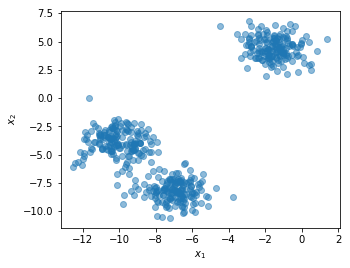

In [36]:
# Generate dataset
X, y = make_blobs(centers=3, n_samples=500, random_state=1)

# Visualize
fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
plt.show()

In [71]:
##### define the functions ---------------------
# 1) initialize centers
def initlize_cluster(points, k):
    """Initializes clusters as k randomly selected points from points."""
    nSmp = points.shape[0]
    return points[np.random.randint(nSmp, size=k)] # size can be tuple or ints. 

# 2) Function for calculating the distance between centroids
def get_dist(center, points):
    """Returns the distance the center is from each data point in points."""
    dist = np.linalg.norm(points - center, axis=1)  
    return dist

# 3) Now let's implement K-means using k = 3.
def kMeans(X, k, maxIter=100):
    nSmp, nFea = X.shape
    # 初始化 -----
    centers = initlize_cluster(X, k)
    classes = np.zeros(nSmp, dtype=np.uint16)
    dist = np.zeros((nSmp, k), dtype=np.float64)
    
    # Loop for the maximum number of iterations
    for it in xrange(maxIter): 
        
        # - Step 1: Assign all points to the nearest centroid 
        for j, c in enumerate(centers): 
            dist[:,j] = get_dist(c, X)
            
        # Determine class membership of each point by picking the closest centroid
        classes = np.argmin(dist, axis=1)
        
        # - Step 2: update the centers 
        for j in xrange(k):
            centers[j] = np.mean(X[classes==j], axis=0)
    return centers, classes

k = 3
maxIter = 50
centers, classes = kMeans(X, k, maxIter)
# print classes

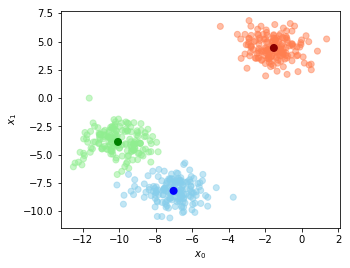

In [72]:
## plot the results -----
group_colors = ["skyblue", "coral", "lightgreen"]
colors = [group_colors[j] for j in classes]

fig, ax = plt.subplots(figsize=(5,4))
ax.scatter(X[:,0], X[:,1], color=colors, alpha=0.5)
ax.scatter(centers[:,0], centers[:,1], color=['blue', 'darkred', 'green'], marker='o', lw=2)
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.show()

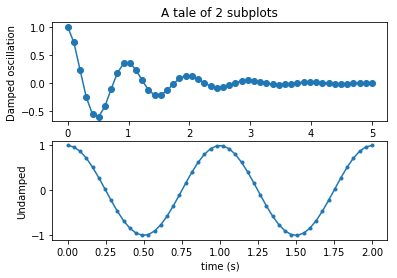

In [8]:
"""
=================
Multiple subplots
=================

Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, '.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

## [Your First Machine Learning Project in Python Step-By-Step](https://machinelearningmastery.com/machine-learning-in-python-step-by-step/)

In [21]:
import sys
print("Python: {}".format(sys.version))

import scipy 
print("Scipy: {}".format(scipy.__version__))

import numpy as np
print("Numpy: {}".format(np.__version__))

import pandas
print("Pandas: {}".format(pandas.__version__))

import sklearn
print("sklearn: {}".format(sklearn.__version__))

Python: 2.7.13 |Anaconda custom (64-bit)| (default, Dec 20 2016, 23:09:15) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
Scipy: 0.19.1
Numpy: 1.14.1
Pandas: 0.19.2
sklearn: 0.18.1


###  Load The Data

#### Import libraries

In [75]:
import pandas
import pandas as pd
# from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### Load Dataset

In [62]:
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names) # name 是每一列的变量的名字.

### Data Visualization

In [66]:
print dataset.shape
print type(dataset)

(150, 5)
<class 'pandas.core.frame.DataFrame'>


In [46]:
print dataset.head(10) # peek the first 10 samples. 

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa


In [61]:
print dataset.describe()

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### Class Distribution

In [54]:
print dataset.groupby("class").size() # 是根据 “class” 总结信息.

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


### Play with Pandas and DataFrame

In [58]:

# play with "pandas" and "DataFrame"
from pandas import DataFrame
df = DataFrame(np.random.randn(5, 3))
df.describe()

,0,1,2
count,5.000000,5.000000,5.000000
mean,0.846274,0.720572,0.109503
std,0.633334,1.617890,1.504007
min,0.347878,-1.430095,-1.630992
25%,0.485809,-0.473345,-1.044252
50%,0.636685,1.201163,-0.031144
75%,0.827601,1.943684,1.450046
max,1.933397,2.361455,1.803858


###  Data Visualization

#### Univariate Plots

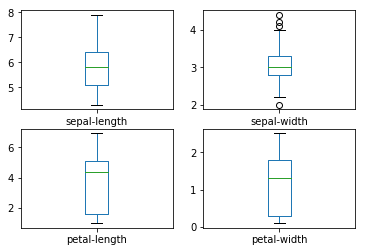

In [63]:
# box and whisker plots
dataset.plot(kind="box", subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

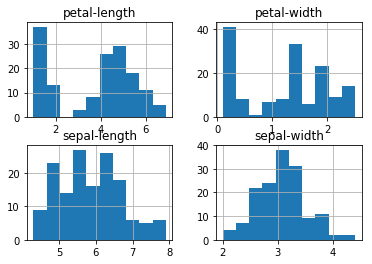

In [64]:
# histograms
dataset.hist()
plt.show()

In [76]:
# scatter plot matrix
scatter_matrix(dataset)
plt.show()

NameError: name 'scatter_matrix' is not defined

### Evaluate Some Algorithms

#### Create a Validation Dataset

In [93]:
# split out validataion dataset
array = dataset.values # 没有括号
X = array[:, 0:4]
Y = array[:, 4]
validataion_size = 0.20
seed = 7
Xtr, Xvali, Ytr, Yvali = model_selection.train_test_split(X, Y, \
                        test_size=validataion_size, random_state=seed)

#### Test the Methods

In [103]:
# Test options and evalution metric
seed = 7
scoring = "accuracy"

#### Build Models

In [109]:
# The methods to be checked
models = []
models.append(("LR", LogisticRegression()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("NB", GaussianNB()))
models.append(("SVM", SVC()))

In [113]:
# evaluate each model in turn
rsts = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_rst = model_selection.cross_val_score(model, Xtr, Ytr, \
                                cv=kfold, scoring=scoring)
    rsts.append(cv_rst)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_rst.mean(), cv_rst.std())
    print msg

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
DecisionTree: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


#### Select Best Model

In [ ]:
# compare the algorithms
fig = plt.figure()
fig.suptitle("Algorithm Comparison")
